In [1]:
import os
import sys
import random
import pickle
import numpy as np
import pandas as pd
import scipy.io as scio
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC, SVR
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
def seed_all(seed: int):
    random.seed(seed)
    np.random.seed(seed)

seed = 42
seed_all(seed)

In [3]:
feature_path = "AWA2/split/res101.mat"
data = scio.loadmat(feature_path)
features = data['features'].transpose(1,0)
labels = data['labels'].reshape(-1).tolist()
first_idx = {}
for label_value in range(1,51):
    first_idx[label_value] = labels.index(label_value)
sorted_first_idx = sorted(first_idx.items(), key= lambda x: x[1])
label_orders = [k for k,v in sorted_first_idx]
start_indices = [v for k,v in sorted_first_idx]
end_indices = start_indices[1:] + [len(labels)]
train_indices, test_indices = [], []
train_labels, test_labels = [], []
for label, start_idx, end_idx in zip(label_orders, start_indices, end_indices):
    category_num = end_idx - start_idx
    train_num = int(category_num * 0.6)
    category_train_indices = sorted(random.sample(range(start_idx, end_idx), train_num))
    train_indices.extend(category_train_indices)
    train_labels.extend([label]*len(category_train_indices))
    category_test_indices = list(set(range(start_idx, end_idx)) - set(category_train_indices))
    test_indices.extend(category_test_indices)
    test_labels.extend([label]*len(category_test_indices))
train_features = features[train_indices]
test_features = features[test_indices]

train_features = np.array(train_features)
test_features = np.array(test_features)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
print(f"train sample num: {len(train_labels)}")
print(f"test sample num: {len(test_labels)}")

train sample num: 22373
test sample num: 14949


In [42]:
LinearRegression_model = LinearRegression()

LinearRegression_model.fit(train_features, train_labels)
with open('LinearRegression.pickle', 'wb') as f:
    pickle.dump(LinearRegression_model, f)

predictions = LinearRegression_model.predict(test_features)
predictions = (np.clip(predictions, 0.5, 50.5) + 0.5).astype(int)
print((test_labels==predictions).sum())
acc_dict, test_dict = {}, {}
for i in range(1, 51):
    acc_dict[i] = test_dict[i] = 0
for pred, label in zip(predictions, test_labels):
    test_dict[label] += 1
    if label == pred:
        acc_dict[label] += 1

print("acc:", acc_dict)
print("test:", test_dict)

879
acc: {1: 63, 2: 7, 3: 3, 4: 1, 5: 6, 6: 11, 7: 28, 8: 20, 9: 2, 10: 12, 11: 0, 12: 2, 13: 28, 14: 12, 15: 16, 16: 9, 17: 4, 18: 22, 19: 28, 20: 35, 21: 11, 22: 20, 23: 34, 24: 27, 25: 23, 26: 15, 27: 47, 28: 25, 29: 49, 30: 8, 31: 44, 32: 16, 33: 14, 34: 5, 35: 4, 36: 15, 37: 15, 38: 43, 39: 30, 40: 15, 41: 14, 42: 10, 43: 26, 44: 1, 45: 18, 46: 15, 47: 0, 48: 5, 49: 9, 50: 12}
test: {1: 419, 2: 341, 3: 117, 4: 78, 5: 220, 6: 299, 7: 658, 8: 414, 9: 70, 10: 200, 11: 76, 12: 40, 13: 351, 14: 274, 15: 288, 16: 282, 17: 117, 18: 284, 19: 416, 20: 349, 21: 292, 22: 266, 23: 568, 24: 396, 25: 292, 26: 312, 27: 480, 28: 279, 29: 436, 30: 154, 31: 481, 32: 236, 33: 227, 34: 124, 35: 109, 36: 304, 37: 358, 38: 468, 39: 350, 40: 538, 41: 252, 42: 286, 43: 408, 44: 74, 45: 348, 46: 412, 47: 86, 48: 205, 49: 536, 50: 379}


acc count: 13819
acc: {1: 371, 2: 322, 3: 100, 4: 57, 5: 218, 6: 266, 7: 619, 8: 373, 9: 33, 10: 180, 11: 74, 12: 38, 13: 347, 14: 262, 15: 287, 16: 249, 17: 93, 18: 229, 19: 412, 20: 326, 21: 230, 22: 257, 23: 549, 24: 374, 25: 277, 26: 282, 27: 470, 28: 260, 29: 431, 30: 142, 31: 481, 32: 219, 33: 199, 34: 84, 35: 89, 36: 278, 37: 327, 38: 468, 39: 349, 40: 495, 41: 233, 42: 268, 43: 404, 44: 35, 45: 344, 46: 364, 47: 64, 48: 178, 49: 454, 50: 358}
test: {1: 419, 2: 341, 3: 117, 4: 78, 5: 220, 6: 299, 7: 658, 8: 414, 9: 70, 10: 200, 11: 76, 12: 40, 13: 351, 14: 274, 15: 288, 16: 282, 17: 117, 18: 284, 19: 416, 20: 349, 21: 292, 22: 266, 23: 568, 24: 396, 25: 292, 26: 312, 27: 480, 28: 279, 29: 436, 30: 154, 31: 481, 32: 236, 33: 227, 34: 124, 35: 109, 36: 304, 37: 358, 38: 468, 39: 350, 40: 538, 41: 252, 42: 286, 43: 408, 44: 74, 45: 348, 46: 412, 47: 86, 48: 205, 49: 536, 50: 379}


/data3/spoilvoid/anaconda3/envs/basic/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


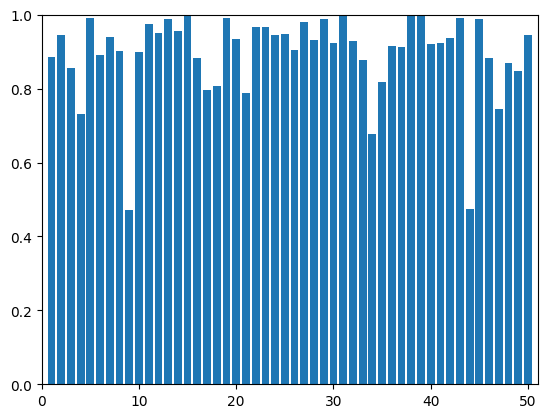

In [46]:
LogisticRegression_model = LogisticRegression()

LogisticRegression_model.fit(train_features, train_labels-1)
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(LogisticRegression_model, f)

predictions = LogisticRegression_model.predict(test_features)
print("acc count:", ((test_labels-1)==predictions).sum())
acc_dict, test_dict = {}, {}
for i in range(1, 51):
    acc_dict[i] = test_dict[i] = 0
for pred, label in zip(predictions, test_labels):
    test_dict[label] += 1
    if label-1 == pred:
        acc_dict[label] += 1

print("acc:", acc_dict)
print("test:", test_dict)

rate = []
acc_count = 0
for i in range(1, 51):
    rate.append(acc_dict[i]/test_dict[i])
    acc_count += acc_dict[i]
canvas = plt.figure()
plt.cla()
plt.bar(range(1, 51), rate)
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.2, 0.2))
plt.xlim(0,51)
plt.xticks(np.arange(0, 51, 10))
plt.show()


acc count: 13709
acc: {1: 346, 2: 311, 3: 100, 4: 59, 5: 216, 6: 263, 7: 609, 8: 376, 9: 42, 10: 172, 11: 71, 12: 37, 13: 347, 14: 250, 15: 287, 16: 259, 17: 91, 18: 216, 19: 403, 20: 319, 21: 229, 22: 255, 23: 543, 24: 374, 25: 271, 26: 266, 27: 471, 28: 260, 29: 428, 30: 138, 31: 479, 32: 210, 33: 189, 34: 79, 35: 87, 36: 266, 37: 322, 38: 468, 39: 348, 40: 506, 41: 224, 42: 258, 43: 401, 44: 51, 45: 340, 46: 364, 47: 70, 48: 184, 49: 494, 50: 360}
test: {1: 419, 2: 341, 3: 117, 4: 78, 5: 220, 6: 299, 7: 658, 8: 414, 9: 70, 10: 200, 11: 76, 12: 40, 13: 351, 14: 274, 15: 288, 16: 282, 17: 117, 18: 284, 19: 416, 20: 349, 21: 292, 22: 266, 23: 568, 24: 396, 25: 292, 26: 312, 27: 480, 28: 279, 29: 436, 30: 154, 31: 481, 32: 236, 33: 227, 34: 124, 35: 109, 36: 304, 37: 358, 38: 468, 39: 350, 40: 538, 41: 252, 42: 286, 43: 408, 44: 74, 45: 348, 46: 412, 47: 86, 48: 205, 49: 536, 50: 379}


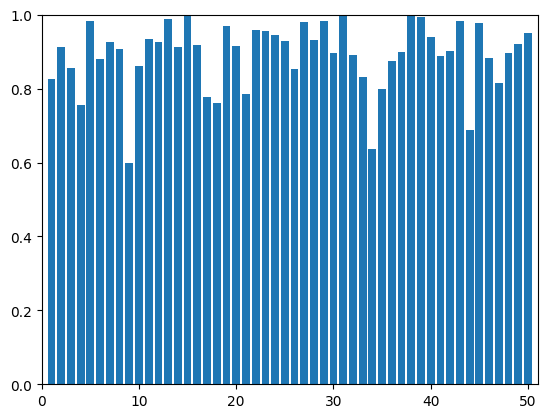

In [47]:
LDA_model = LinearDiscriminantAnalysis()

LDA_model.fit(train_features, train_labels-1)
with open('LinearDiscriminantAnalysis.pickle', 'wb') as f:
    pickle.dump(LDA_model, f)

predictions = LDA_model.predict(test_features)
print("acc count:", ((test_labels-1)==predictions).sum())
acc_dict, test_dict = {}, {}
for i in range(1, 51):
    acc_dict[i] = test_dict[i] = 0
for pred, label in zip(predictions, test_labels):
    test_dict[label] += 1
    if label-1 == pred:
        acc_dict[label] += 1

print("acc:", acc_dict)
print("test:", test_dict)

rate = []
acc_count = 0
for i in range(1, 51):
    rate.append(acc_dict[i]/test_dict[i])
    acc_count += acc_dict[i]
canvas = plt.figure()
plt.cla()
plt.bar(range(1, 51), rate)
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.2, 0.2))
plt.xlim(0,51)
plt.xticks(np.arange(0, 51, 10))
plt.show()

acc count: 13788
acc: {1: 364, 2: 319, 3: 102, 4: 58, 5: 218, 6: 269, 7: 622, 8: 375, 9: 35, 10: 179, 11: 74, 12: 37, 13: 347, 14: 257, 15: 287, 16: 244, 17: 96, 18: 223, 19: 412, 20: 320, 21: 234, 22: 255, 23: 553, 24: 376, 25: 273, 26: 286, 27: 472, 28: 259, 29: 432, 30: 140, 31: 481, 32: 218, 33: 197, 34: 82, 35: 98, 36: 270, 37: 327, 38: 467, 39: 349, 40: 487, 41: 230, 42: 264, 43: 403, 44: 40, 45: 342, 46: 359, 47: 65, 48: 179, 49: 453, 50: 359}
test: {1: 419, 2: 341, 3: 117, 4: 78, 5: 220, 6: 299, 7: 658, 8: 414, 9: 70, 10: 200, 11: 76, 12: 40, 13: 351, 14: 274, 15: 288, 16: 282, 17: 117, 18: 284, 19: 416, 20: 349, 21: 292, 22: 266, 23: 568, 24: 396, 25: 292, 26: 312, 27: 480, 28: 279, 29: 436, 30: 154, 31: 481, 32: 236, 33: 227, 34: 124, 35: 109, 36: 304, 37: 358, 38: 468, 39: 350, 40: 538, 41: 252, 42: 286, 43: 408, 44: 74, 45: 348, 46: 412, 47: 86, 48: 205, 49: 536, 50: 379}


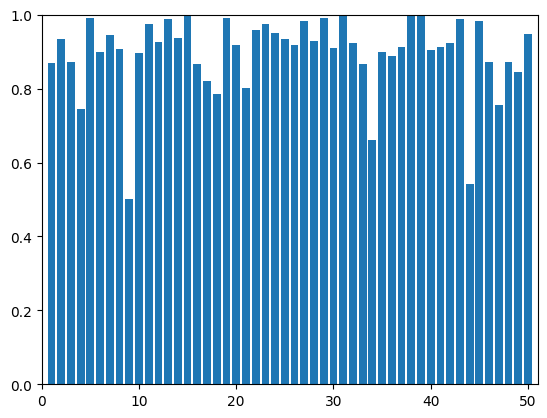

In [48]:
SVC_model = SVC(kernel='linear')

SVC_model.fit(train_features, train_labels-1)
with open('SVC.pickle', 'wb') as f:
    pickle.dump(SVC_model, f)

predictions = SVC_model.predict(test_features)
print("acc count:", ((test_labels-1)==predictions).sum())
acc_dict, test_dict = {}, {}
for i in range(1, 51):
    acc_dict[i] = test_dict[i] = 0
for pred, label in zip(predictions, test_labels):
    test_dict[label] += 1
    if label-1 == pred:
        acc_dict[label] += 1

print("acc:", acc_dict)
print("test:", test_dict)

rate = []
acc_count = 0
for i in range(1, 51):
    rate.append(acc_dict[i]/test_dict[i])
    acc_count += acc_dict[i]
canvas = plt.figure()
plt.cla()
plt.bar(range(1, 51), rate)
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.2, 0.2))
plt.xlim(0,51)
plt.xticks(np.arange(0, 51, 10))
plt.show()

In [4]:
SVR_model = SVR(kernel='linear')

SVR_model.fit(train_features, train_labels-1)
with open('SVR.pickle', 'wb') as f:
    pickle.dump(SVR_model, f)

predictions = SVR_model.predict(test_features)
print("acc count:", ((test_labels-1)==predictions).sum())
acc_dict, test_dict = {}, {}
for i in range(1, 51):
    acc_dict[i] = test_dict[i] = 0
for pred, label in zip(predictions, test_labels):
    test_dict[label] += 1
    if label-1 == pred:
        acc_dict[label] += 1

print("acc:", acc_dict)
print("test:", test_dict)

rate = []
acc_count = 0
for i in range(1, 51):
    rate.append(acc_dict[i]/test_dict[i])
    acc_count += acc_dict[i]
canvas = plt.figure()
plt.cla()
plt.bar(range(1, 51), rate)
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.2, 0.2))
plt.xlim(0,51)
plt.xticks(np.arange(0, 51, 10))
plt.show()